In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations and zip object them with zip() function.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.



In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#You can only unzip a zipped tuple once before it is removed from the computer's memory. 
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [4]:
# Import
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Open Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=755f33187f86c3f74d9f8ae7856e6b2d


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Let's use the enumerate() method to get the index of the city for logging purposes 
#and the city for creating an endpoint URL. 
#Add the following code below our counters.

# Loop through all the cities in the list.

#We create the for loop with the enumerate() method and reference the index and the city in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    #In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 
    #and if the index is greater than or equal to 50. 
    #If the statement is true, then the set_count and the record_count are incremented by 1.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #Inside the conditional statement, we create the URL endpoint for each city, as before. 
    #However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). 
    #This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.


    # Log the URL, record, and set numbers and the city.
    #Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    #Then above we add one to the record count before the next city is processed.
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        #pass is a general purpose statement to handle all errors encountered & to allow the program to continue.

# Indicate that Data Loading is complete by adding the closing print statement
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chenghai
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | shingu
Processing Record 4 of Set 1 | la rioja
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 10 of Set 1 | tezu
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | adrar
Processing Record 13 of Set 1 | flin flon
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | umuarama
Processing Record 16 of Set 1 | hervey bay
Processing Record 17 of Set 1 | mbumi
Processing Record 18 of Set 1 | bandarbeyla
Processing Record 19 of Set 1 | pemangkat
Processing Record 20 of Set 1 | aqtobe
Processing Record 21 of Set 1 | kahului
Processing Record 22 of Set

Processing Record 39 of Set 4 | broken hill
Processing Record 40 of Set 4 | angoche
Processing Record 41 of Set 4 | vanavara
Processing Record 42 of Set 4 | inuvik
Processing Record 43 of Set 4 | zyryanovsk
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | nokaneng
Processing Record 46 of Set 4 | kapit
Processing Record 47 of Set 4 | lolua
City not found. Skipping...
Processing Record 48 of Set 4 | cap malheureux
Processing Record 49 of Set 4 | pinega
Processing Record 50 of Set 4 | jampur
Processing Record 1 of Set 5 | bambanglipuro
Processing Record 2 of Set 5 | areka
Processing Record 3 of Set 5 | misratah
Processing Record 4 of Set 5 | ramtek
Processing Record 5 of Set 5 | haapiti
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | aswan
Processing Record 8 of Set 5 | celestun
Processing Record 9 of Set 5 | asayita
City not found. Skipping...
Processing Record 10 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 

Processing Record 26 of Set 8 | cockburn town
Processing Record 27 of Set 8 | limoeiro do norte
Processing Record 28 of Set 8 | igarka
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | torata
Processing Record 31 of Set 8 | olinda
Processing Record 32 of Set 8 | ashqelon
Processing Record 33 of Set 8 | shimoda
Processing Record 34 of Set 8 | plettenberg bay
Processing Record 35 of Set 8 | dongsheng
Processing Record 36 of Set 8 | korla
Processing Record 37 of Set 8 | portland
Processing Record 38 of Set 8 | marsa matruh
Processing Record 39 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 8 | belaya gora
Processing Record 41 of Set 8 | alofi
Processing Record 42 of Set 8 | jaciara
Processing Record 43 of Set 8 | najran
Processing Record 44 of Set 8 | arica
Processing Record 45 of Set 8 | mucurapo
Processing Record 46 of Set 8 | inhambane
Processing Record 47 of Set 8 | odweyne
Processing Record 48 of Set 8 | george town
Processing R

Processing Record 14 of Set 12 | hualmay
Processing Record 15 of Set 12 | gariadhar
Processing Record 16 of Set 12 | scarborough
Processing Record 17 of Set 12 | hundested
Processing Record 18 of Set 12 | bartica
Processing Record 19 of Set 12 | alice springs
Processing Record 20 of Set 12 | manggar
Processing Record 21 of Set 12 | elizabeth city
Processing Record 22 of Set 12 | pandan
Processing Record 23 of Set 12 | san-pedro
Processing Record 24 of Set 12 | maniitsoq
Processing Record 25 of Set 12 | zilair
Processing Record 26 of Set 12 | viligili
City not found. Skipping...
Processing Record 27 of Set 12 | yoichi
Processing Record 28 of Set 12 | muros
Processing Record 29 of Set 12 | ponta delgada
Processing Record 30 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 31 of Set 12 | hohhot
Processing Record 32 of Set 12 | tsabong
Processing Record 33 of Set 12 | ardatov
Processing Record 34 of Set 12 | yala
Processing Record 35 of Set 12 | ishigaki
Processing Record 

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chenghai,23.4632,116.7680,61.16,84,100,13.02,CN,2022-03-22 20:03:29
1,Albany,42.6001,-73.9662,51.58,26,30,4.00,US,2022-03-22 20:02:26
2,Shingu,33.7333,135.9833,42.26,81,100,6.40,JP,2022-03-22 20:03:29
3,La Rioja,42.2500,-2.5000,40.78,88,96,7.16,ES,2022-03-22 19:58:57
4,Port Hardy,50.6996,-127.4199,47.52,93,100,20.33,CA,2022-03-22 20:03:30
5,Cabo San Lucas,22.8909,-109.9124,80.62,31,0,12.66,MX,2022-03-22 20:00:49
6,Busselton,-33.6500,115.3333,53.02,82,0,11.03,AU,2022-03-22 20:02:47
7,Tezu,27.9167,96.1667,76.98,33,87,4.21,IN,2022-03-22 20:03:30
8,Thompson,55.7435,-97.8558,24.96,93,100,2.30,CA,2022-03-22 20:02:28
9,Adrar,20.5022,-10.0711,81.73,9,0,7.11,MR,2022-03-22 20:03:31


In [38]:
#Next reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.
#Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#Then, we assign a new or the same DataFrame with new column order:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chenghai,CN,2022-03-22 20:03:29,23.4632,116.7680,61.16,84,100,13.02
1,Albany,US,2022-03-22 20:02:26,42.6001,-73.9662,51.58,26,30,4.00
2,Shingu,JP,2022-03-22 20:03:29,33.7333,135.9833,42.26,81,100,6.40
3,La Rioja,ES,2022-03-22 19:58:57,42.2500,-2.5000,40.78,88,96,7.16
4,Port Hardy,CA,2022-03-22 20:03:30,50.6996,-127.4199,47.52,93,100,20.33
...,...,...,...,...,...,...,...,...,...
559,Gizo,SB,2022-03-22 20:18:16,-8.1030,156.8419,82.15,74,60,6.49
560,La Sarre,CA,2022-03-22 20:18:16,48.8002,-79.1996,31.41,71,84,8.21
561,Acari,PE,2022-03-22 20:18:16,-15.4311,-74.6158,79.84,57,6,11.30
562,Arman,RU,2022-03-22 20:18:17,59.7000,150.1667,10.02,95,100,5.59


In [39]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
#Get data for scatteree chart
#We will need latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

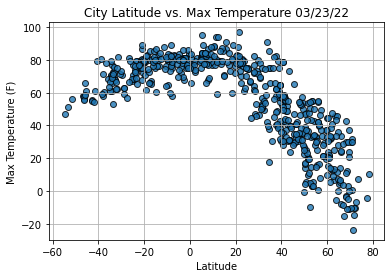

In [41]:
#add the following code to create a scatter plot for the latitude vs. maximum temperature and run the cell.
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

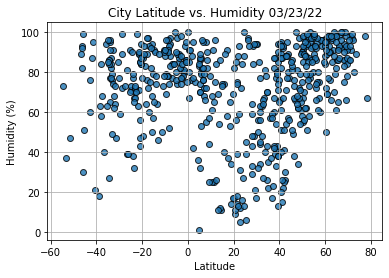

In [42]:
# Build the scatter plots for latitude vs. humidity.
#Change title and yaxis label to humidity %
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


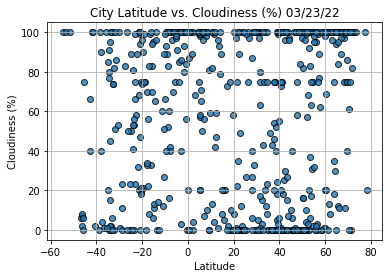

In [43]:
#Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," 
#the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


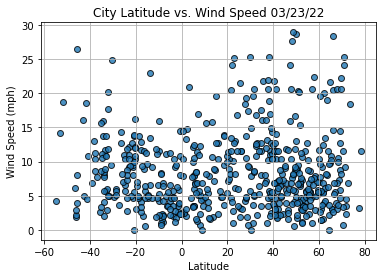

In [44]:
#repurpose the code we have been using and change the y-axis variable to "wind speed," 
#the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."


# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
#Create a Linear Regression Function#
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
plot_linear_regression

<function __main__.plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)>

In [50]:
#Create the Hemisphere DataFrames 6.4.2
#To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. 
#The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. 
#apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell 
#and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. 
#The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].
index13 = city_data_df.loc[13]
index13


City                   Hervey Bay
Country                        AU
Date          2022-03-22 20:03:32
Lat                      -25.2986
Lng                      152.8535
Max Temp                    67.01
Humidity                       91
Cloudiness                      0
Wind Speed                  11.01
Name: 13, dtype: object

In [51]:
#We can also filter a DataFrame based on a value of a row. 
#Ex, if we wanted to get all Northern Hemisphere latitudes, 
#for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. 
#Executing this code will return either "True" or "False" for all the rows that meet these criteria.
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
559    False
560     True
561    False
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [57]:
#If we want to return a DataFrame with all data fitting the criteria, 
#for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. 
#Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
#head() function to display the 1st 5 rows of df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chenghai,CN,2022-03-22 20:03:29,23.4632,116.7680,61.16,84,100,13.02
1,Albany,US,2022-03-22 20:02:26,42.6001,-73.9662,51.58,26,30,4.00
2,Shingu,JP,2022-03-22 20:03:29,33.7333,135.9833,42.26,81,100,6.40
3,La Rioja,ES,2022-03-22 19:58:57,42.2500,-2.5000,40.78,88,96,7.16
4,Port Hardy,CA,2022-03-22 20:03:30,50.6996,-127.4199,47.52,93,100,20.33


In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)].head()


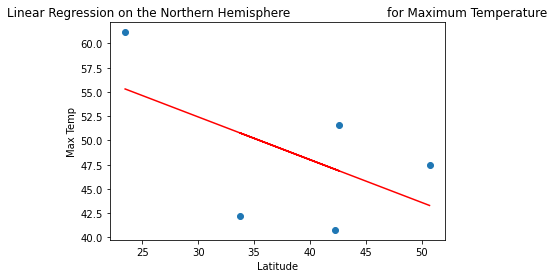

In [66]:
#Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
#text_coordinates=text_coordinates(50,50)

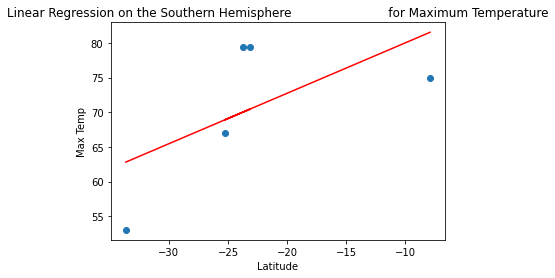

In [69]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))